In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
states = [1,2,3,4,5,6,7,8,9]
actions = ['droite', 'haut','gauche','bas']
w = 'gauche'
f = 0.1 #force du vent

In [12]:
def transition_matrix_wind(u, wind, force):
        
    if u == 'gauche':
        mini = np.array([[1,0,0],[1,0,0],[0,1,0]])
        zeros_block = np.array([[0,0,0],[0,0,0],[0,0,0]])
        tr = np.block([[mini, zeros_block, zeros_block], [zeros_block,mini, zeros_block],[zeros_block,zeros_block,mini]])
    if u == 'droite':
        mini = np.array([[0,1,0],[0,0,1],[0,0,1]])
        zeros_block = np.array([[0,0,0],[0,0,0],[0,0,0]])
        tr = np.block([[mini, zeros_block, zeros_block], [zeros_block,mini, zeros_block],[zeros_block,zeros_block,mini]])
    if u == 'haut':
        mini = np.eye(3)
        zeros_block = np.array([[0,0,0],[0,0,0],[0,0,0]])
        tr = np.block([[mini, zeros_block, zeros_block], [mini, zeros_block, zeros_block],[zeros_block,mini,zeros_block]])
    if u == 'bas':
        mini = np.eye(3)
        zeros_block = np.array([[0,0,0],[0,0,0],[0,0,0]])
        tr = np.block([[zeros_block, mini, zeros_block], [zeros_block, zeros_block, mini],[zeros_block,zeros_block, mini]])
    
    #adding a wind component:
    if wind == 'droite':
        mini_wind = np.array([[1-force,force,0],[0,1-force,force],[0,0,1]])
        zeros_block = np.array([[0,0,0],[0,0,0],[0,0,0]])
        wind_mat = np.block([[mini_wind, zeros_block, zeros_block], [zeros_block,mini_wind, zeros_block],[zeros_block,zeros_block,mini_wind]])
    if wind == 'gauche':
        mini_wind = np.array([[1,0,0],[force,1-force,0],[0,force,1-force]])
        zeros_block = np.array([[0,0,0],[0,0,0],[0,0,0]])
        wind_mat = np.block([[mini_wind, zeros_block, zeros_block], [zeros_block,mini_wind, zeros_block],[zeros_block,zeros_block,mini_wind]])
    if wind == 'haut':
        mini_wind1 = np.identity(3)*force
        mini_wind2 = np.identity(3)*(1-force)
        zeros_block = np.array([[0,0,0],[0,0,0],[0,0,0]])
        wind_mat = np.block([[np.identity(3), zeros_block, zeros_block], [mini_wind1,mini_wind2, zeros_block],[zeros_block,mini_wind1,mini_wind2]])
    if wind == 'bas':
        mini_wind1 = np.identity(3)*force
        mini_wind2 = np.identity(3)*(1-force)
        zeros_block = np.array([[0,0,0],[0,0,0],[0,0,0]])
        wind_mat = np.block([[mini_wind2,mini_wind1, zeros_block],[zeros_block,mini_wind2,mini_wind1], [zeros_block, zeros_block,np.identity(3)]])
        
    return (np.dot(tr, wind_mat))

In [13]:
transition_matrix_wind('droite', 'haut', 0.1)

array([[0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.1, 0. , 0. , 0.9, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.1, 0. , 0. , 0.9, 0. , 0. , 0. ],
       [0. , 0. , 0.1, 0. , 0. , 0.9, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.1, 0. , 0. , 0.9, 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.1, 0. , 0. , 0.9],
       [0. , 0. , 0. , 0. , 0. , 0.1, 0. , 0. , 0.9]])

In [14]:
def transition_wind(s, u, wind, force):
    tr = transition_matrix_wind(u, wind, force)
    ligne = tr[s - 1]
    return np.random.choice(states, size=1, replace=True, p=ligne)[0]

In [15]:
def reward(s, u):
    if s==3:
        return 10
    elif s==4:
        return -10
    else:
        return 0

In [16]:
def env_step_wind(s, u, wind, force):
    next_state = transition_wind(s, u, wind, force)
    rew = reward(s, u)
    done = ((s == 3) or (next_state == 3))
    return next_state, rew, done

# Q-learning algorithm

In [17]:
q_table_wind = np.zeros([len(states),len(actions)])

In [18]:
# Hyperparameters
alpha = 0.1
gamma = 0.6
epsilon = 0.1

# For plotting metrics
all_epochs = []
all_penalties = []

In [19]:
for i in range(10000):
    s = np.random.randint(1,len(states)+1) #initial state
    state_index = s-1
    
    epochs, penalties, rew = 0, 0, 0
    done = False
    
    for j in range(5):
        if np.random.uniform(0, 1) < epsilon:
            action_index = np.random.randint(0,len(actions)) # Explore action space
        else:
            action_index = np.argmax(q_table_wind[state_index]) # Exploit learned values

        u = actions[action_index]

        next_state, rew, done = env_step_wind(s, u, w, f)
        next_state_index = next_state - 1
        
        old_value = q_table_wind[state_index, action_index]
        next_max = np.max(q_table_wind[next_state_index])

        new_value = (1 - alpha) * old_value + alpha * (rew + gamma * next_max)
        q_table_wind[state_index, action_index] = new_value

        if rew == -10:
            penalties += 1

        s = next_state
        state_index = s-1

        epochs += 1

print("Training finished.\n")

Training finished.



In [20]:
print(actions)
print(q_table_wind)

['droite', 'haut', 'gauche', 'bas']
[[  7.87735118   4.64551048   4.69373705  -3.21111045]
 [ 12.96428051   7.82043076   4.72903264   3.72451439]
 [ 22.22060989  22.75702978  17.4157197   17.84735417]
 [ -5.77116787  -5.17296075 -13.10001903  -8.25368366]
 [  7.3191757    7.72339005  -3.17362384   2.47391338]
 [  7.51951319  13.90882961   3.32974949   4.36102282]
 [  2.55352693  -2.92584593   1.39706915   1.47692362]
 [  4.40603434   3.64018474   1.52890757   2.5294096 ]
 [  4.57044916   7.65828737   2.53762668   4.51418251]]


## Computing optimal values using value iteration algorithm

In [21]:
q_dp_wind = np.zeros([len(states),len(actions)])
q_dp_wind[2]=10
q_dp_wind[3]=-10


In [22]:
for t in range(100, 0,-1):
    q_dp_wind_new = q_dp_wind.copy()
    for i in range(len(states)):
        for j in range(len(actions)):
            u = actions[j]
            s = states[i]
            trmat = transition_matrix_wind(u,w,f)
            ligne_i = trmat[i]
            q_max = np.max(q_dp_wind, axis = 1)
            q_dp_wind_new[i][j] = reward(s,u) + gamma*np.dot(q_max, ligne_i)
    q_dp_wind = q_dp_wind_new

In [23]:
print(actions)
q_dp_wind

['droite', 'haut', 'gauche', 'bas']


array([[  7.75531915,   4.65319149,   4.65319149,  -3.20808511],
       [ 13.5       ,   7.75531915,   4.65319149,   3.86706383],
       [ 23.5       ,  23.5       ,  17.75531915,  17.75531915],
       [ -6.13293617,  -5.34680851, -13.20808511,  -8.46438361],
       [  7.75531915,   7.75531915,  -3.20808511,   2.55936064],
       [  7.75531915,  13.5       ,   3.86706383,   4.45518334],
       [  2.55936064,  -3.20808511,   1.53561639,   1.53561639],
       [  4.45518334,   3.86706383,   1.53561639,   2.55936064],
       [  4.45518334,   7.75531915,   2.55936064,   4.45518334]])

In [24]:
#error
(np.mean((q_table_wind-q_dp_wind)**2))**0.5

0.32350481643004486

## Comparing number of iterations vs error

In [25]:
time_steps = np.logspace(1, 5, 10, endpoint=True).astype(int)
error = np.zeros(len(time_steps))

In [26]:
for k in range(len(time_steps)):
    print(k)
    time = time_steps[k]
    q_table_wind = np.zeros([len(states),len(actions)])
    for i in range(time):
        s = np.random.randint(1,len(states)+1) #initial state
        state_index = s-1

        epochs, penalties, rew = 0, 0, 0
        done = False

        for j in range(3):
            if np.random.uniform(0, 1) < epsilon:
                action_index = np.random.randint(0,len(actions)) # Explore action space
            else:
                action_index = np.argmax(q_table_wind[state_index]) # Exploit learned values

            u = actions[action_index]

            next_state, rew, done = env_step_wind(s, u, w, f)
            next_state_index = next_state - 1

            old_value = q_table_wind[state_index, action_index]
            next_max = np.max(q_table_wind[next_state_index])

            new_value = (1 - alpha) * old_value + alpha * (rew + gamma * next_max)
            q_table_wind[state_index, action_index] = new_value

            if rew == -10:
                penalties += 1

            s = next_state
            state_index = s-1

            epochs += 1
            
    error[k] = (np.mean((q_table_wind-q_dp_wind)**2))**0.5


print("Training finished.\n")

0
1
2
3
4
5
6
7
8
9


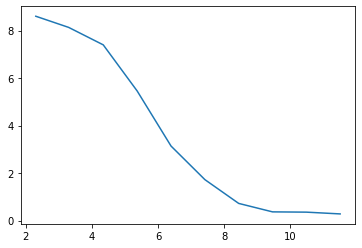

In [32]:
plt.plot(np.log(time_steps), error)

In [33]:
time_steps

array([    10,     27,     77,    215,    599,   1668,   4641,  12915,
        35938, 100000])